# Credit Score Project

---

## Importing the data

In [104]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice

In [105]:
# Display dataset with no index column
raw_df = pd.read_csv('train_biased.csv')
df = raw_df.copy()
raw_df

,ID,Customer_ID,Month,Name,City,Street,Age,SSN,Occupation,Annual_Income,...,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Credit_Score
0,NaN,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,821-00-0265,Manager,19114.12,...,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736,3
2,0x1604,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,821-00-0265,Manager,19114.12,...,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713,3
4,NaN,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,821-00-0265,Manager,19114.12,...,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,BadShire,North Street,NaN,078-73-5990,Cleaner,39628.99,...,7,11.5,NaN,_,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485,1
99996,0x25fea,CUS_0x942c,May,Nicks,BadShire,North Street,25.0,078-73-5990,Cleaner,39628.99,...,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385,1
99997,0x25feb,NaN,June,Nicks,BadShire,North Street,25.0,078-73-5990,Cleaner,NaN,...,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441,1
99998,0x25fec,CUS_0x942c,July,Nicks,Standhampton,North Street,25.0,078-73-5990,Cleaner,39628.99,...,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603,2


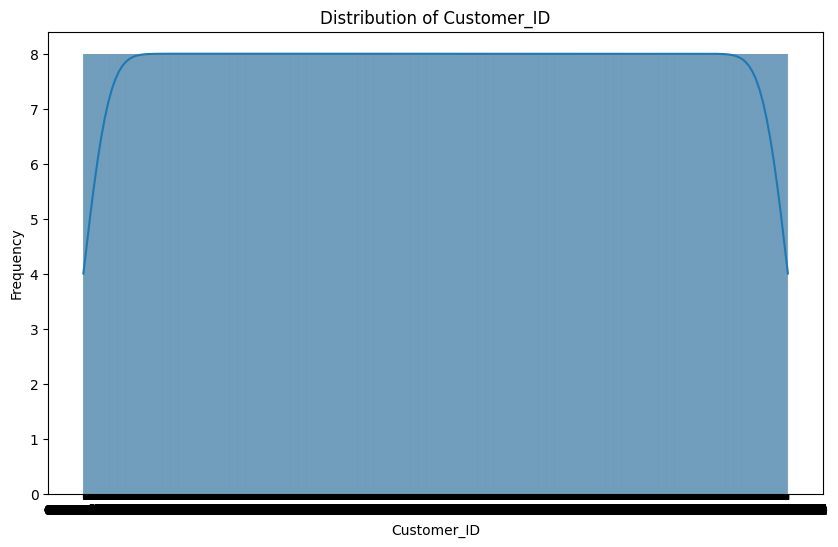

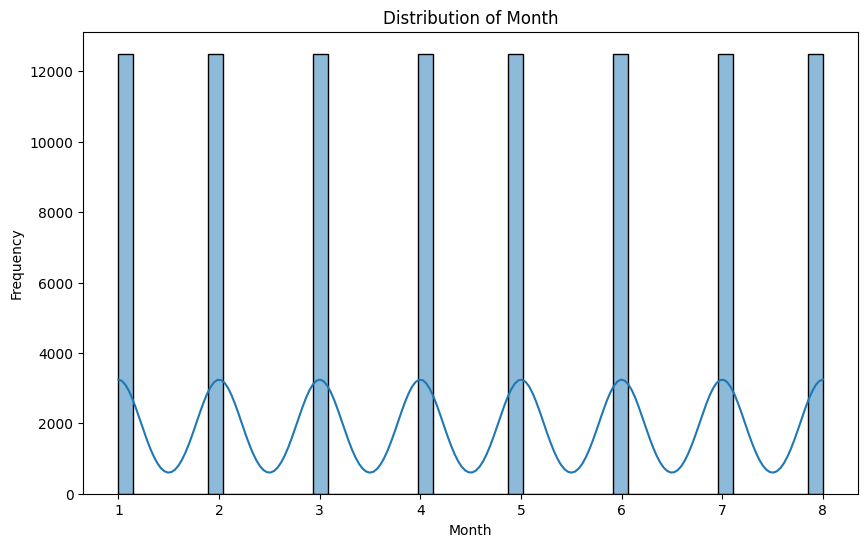

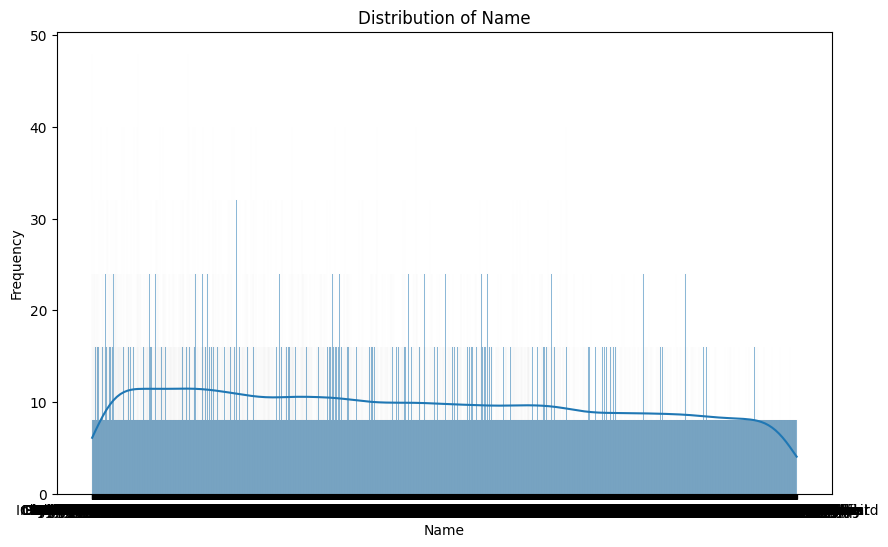

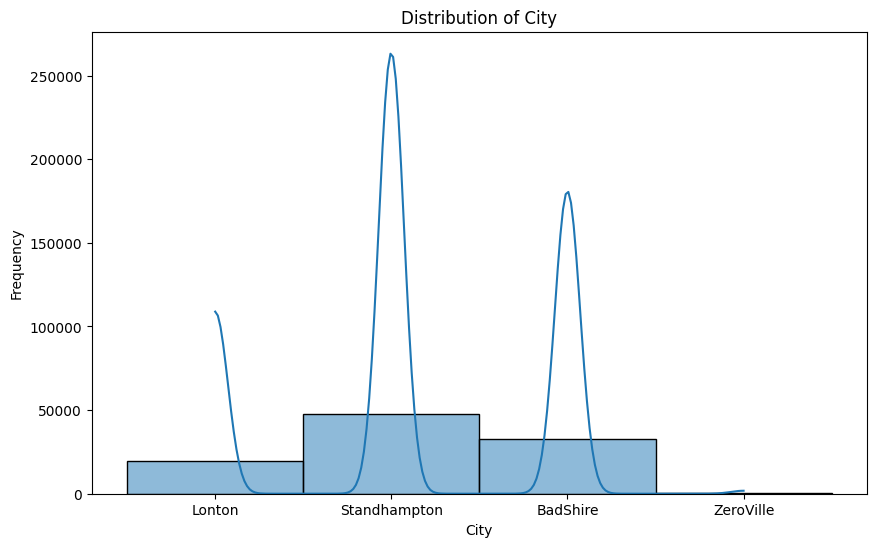

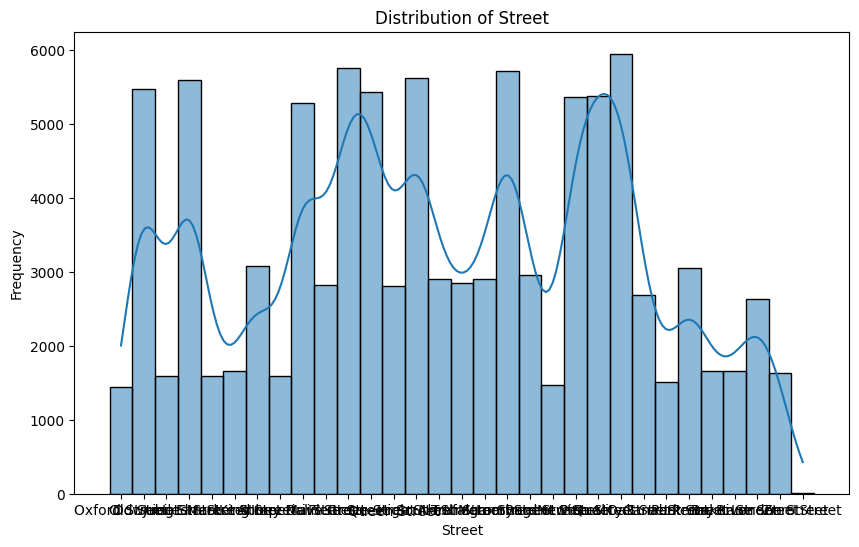

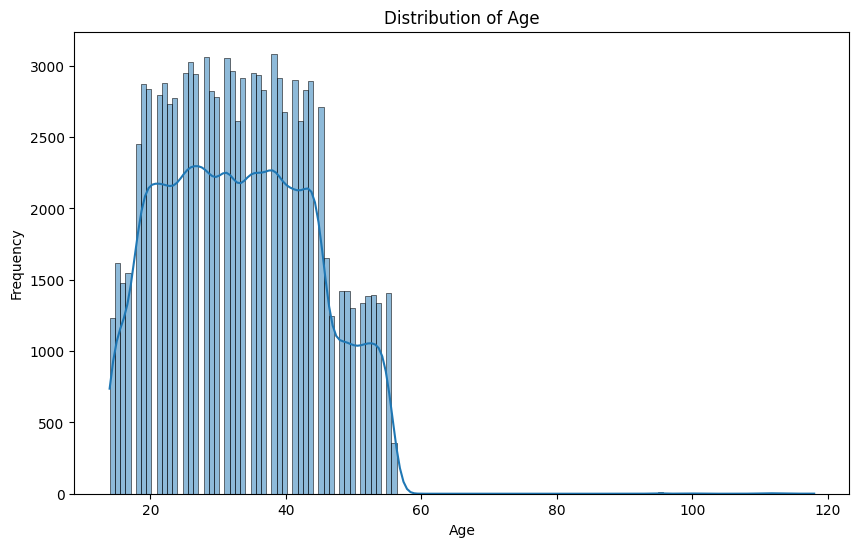

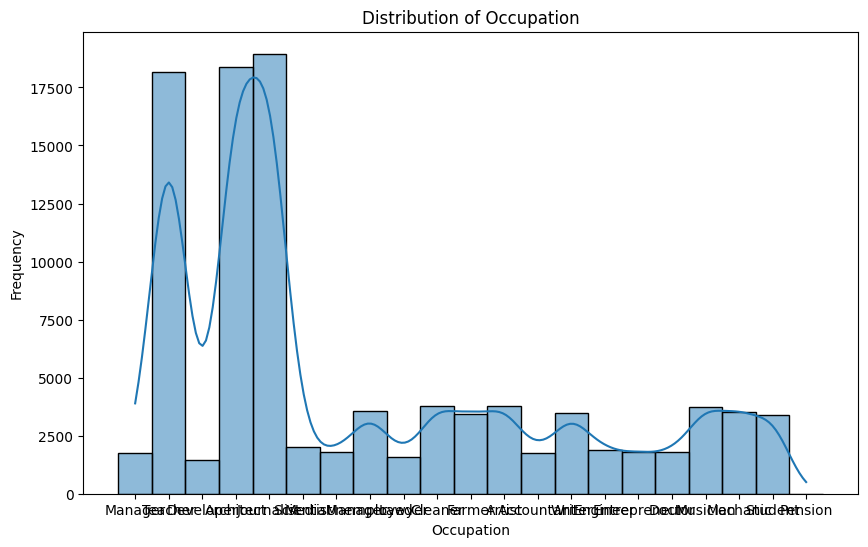

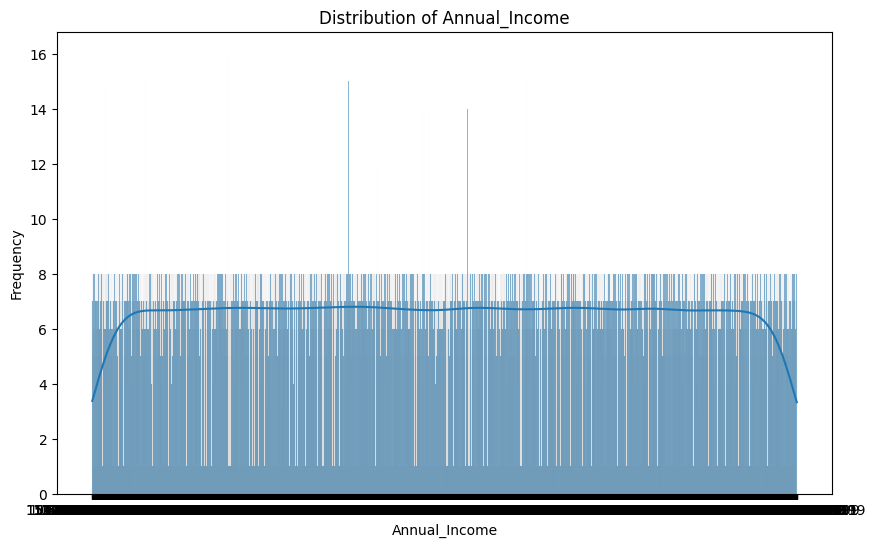

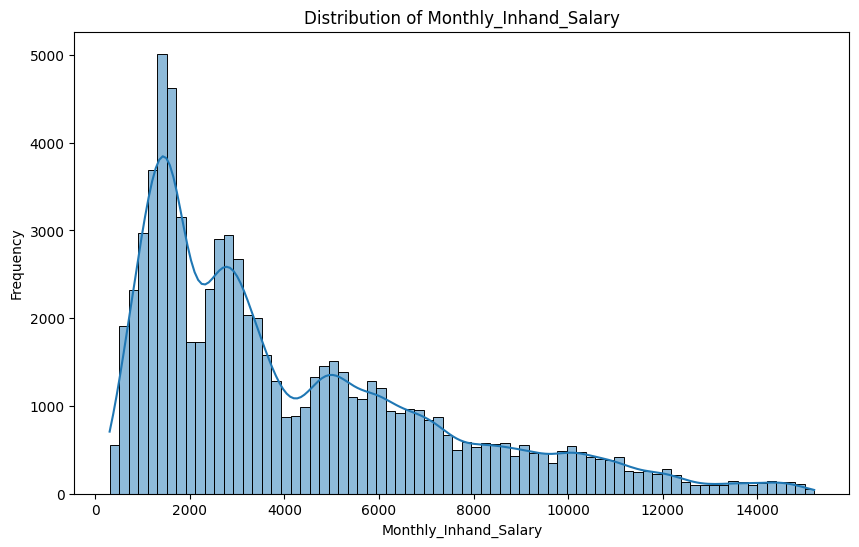

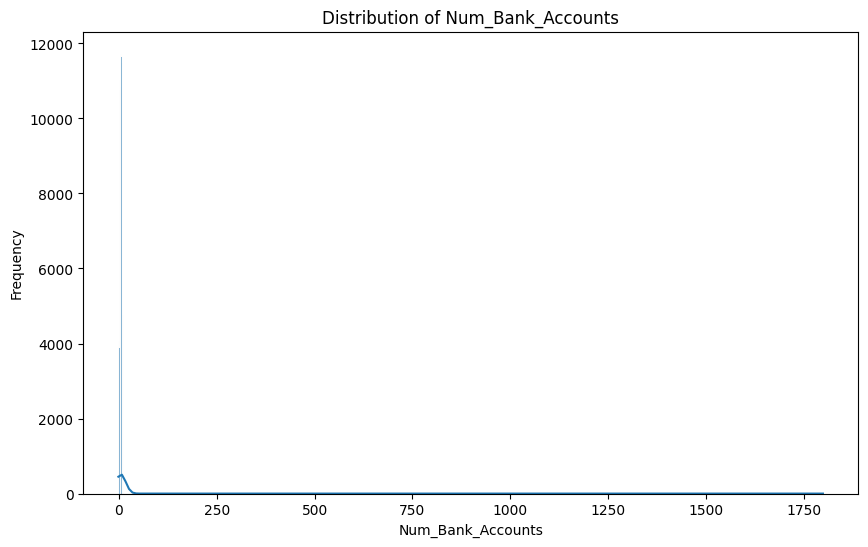

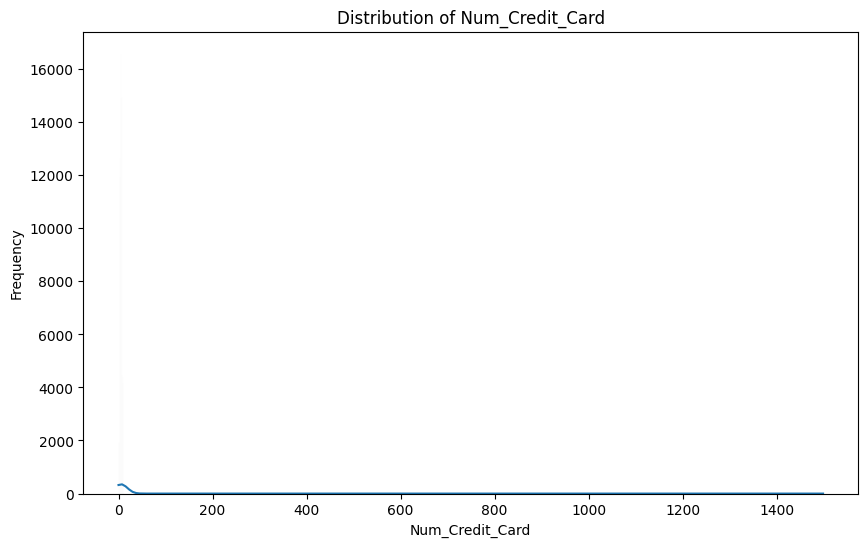

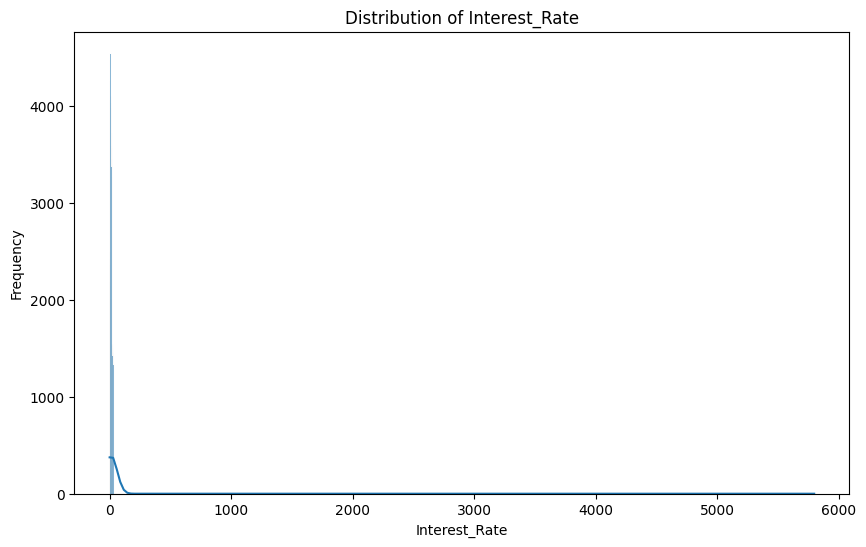

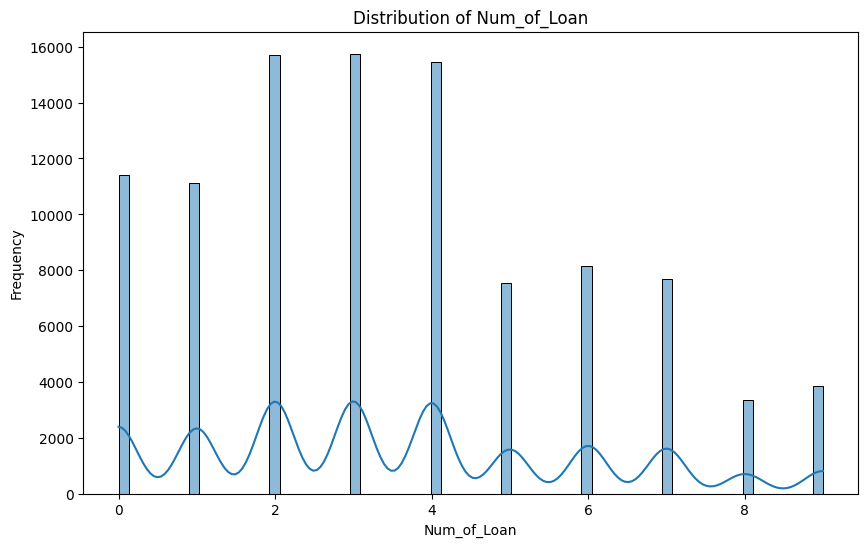

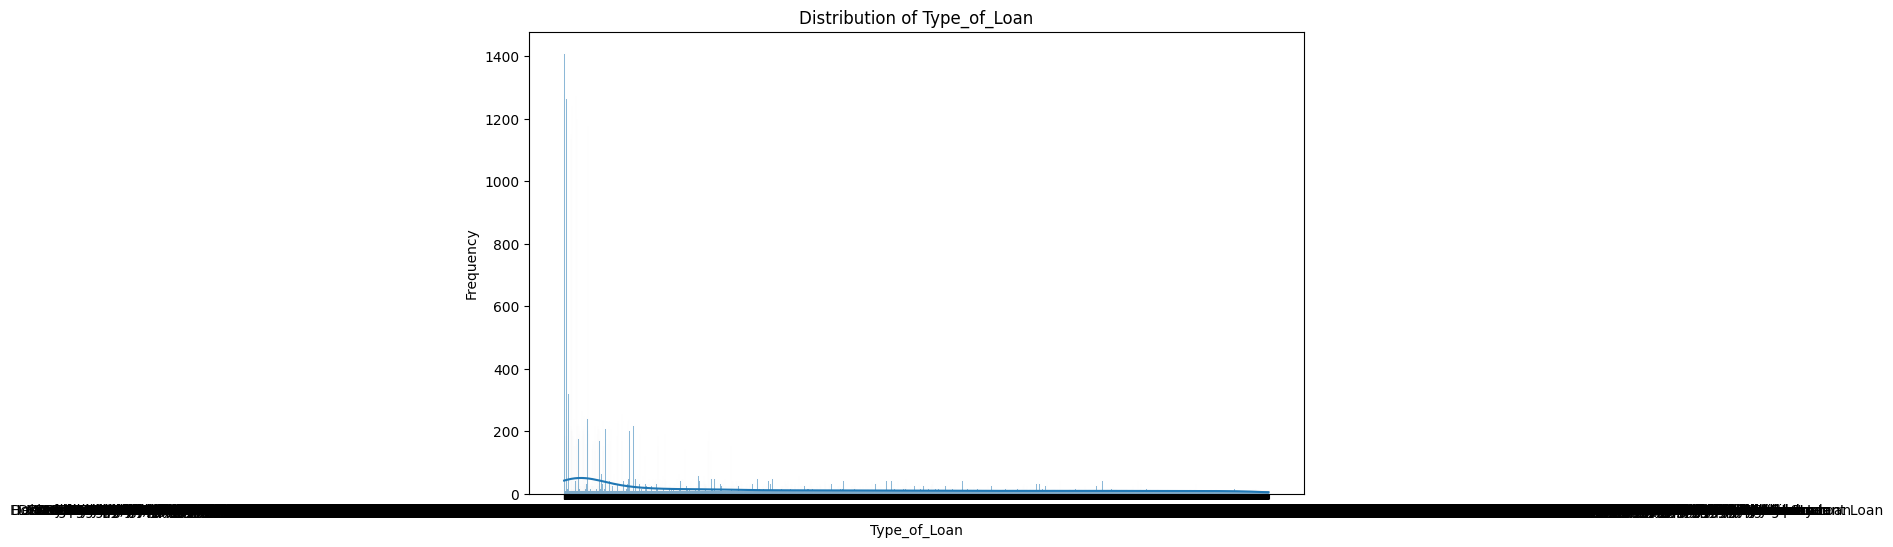

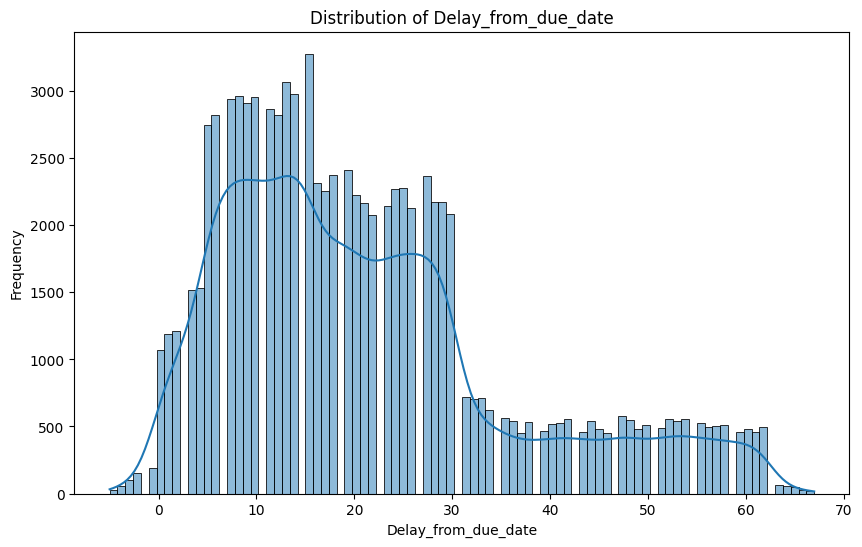

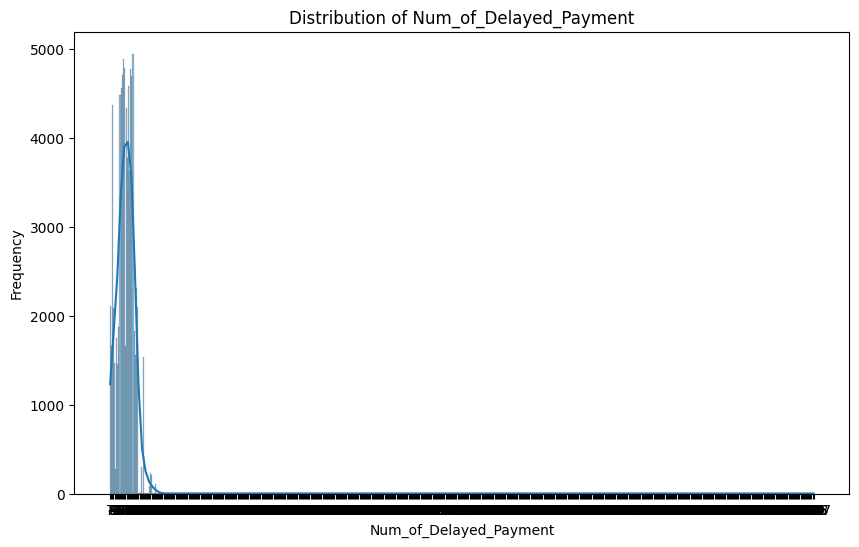

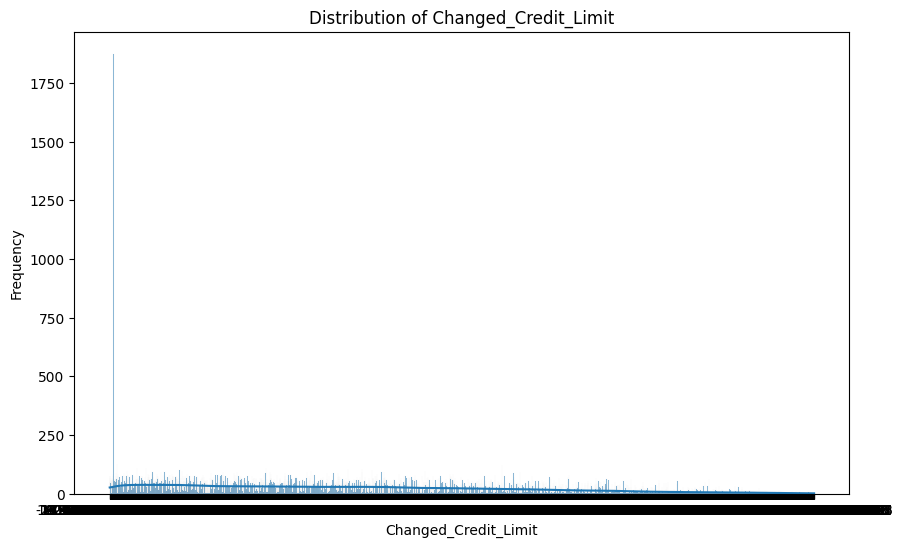

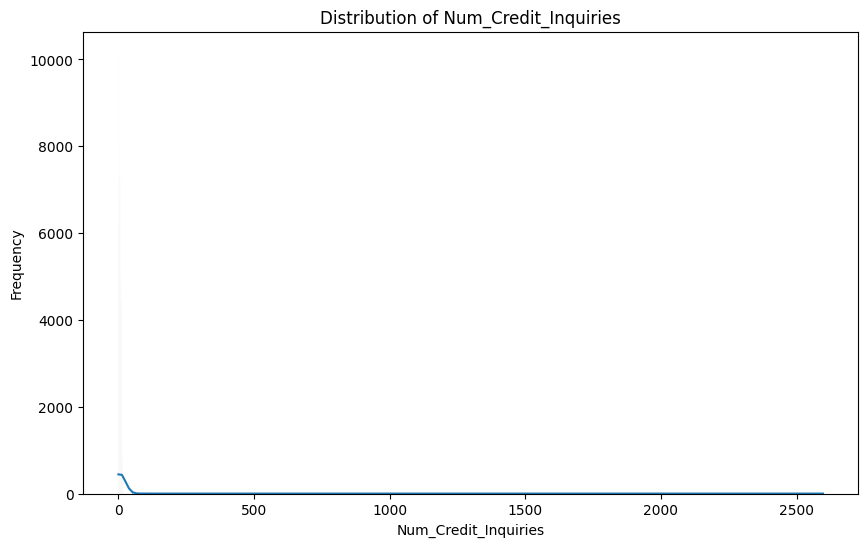

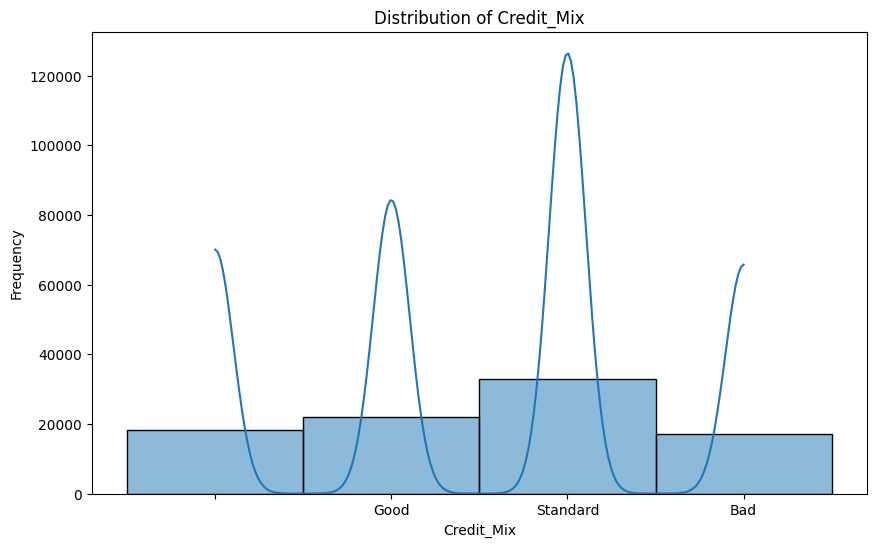

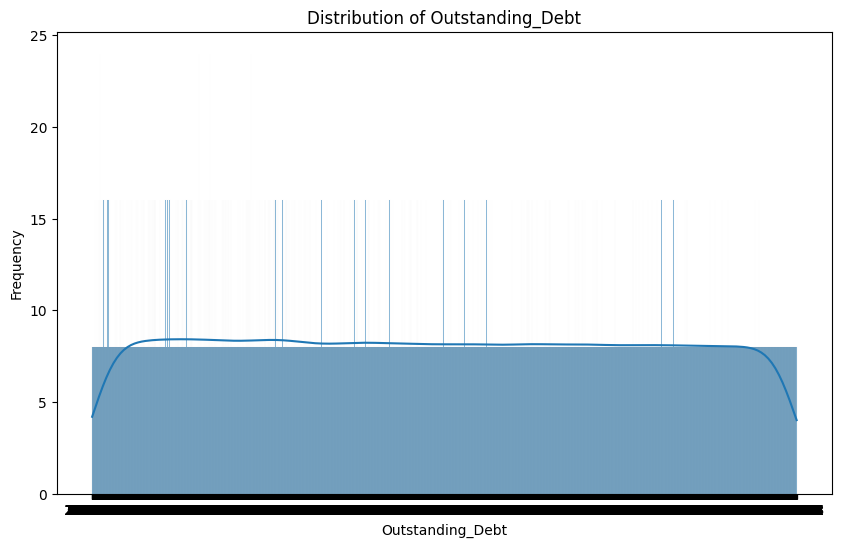

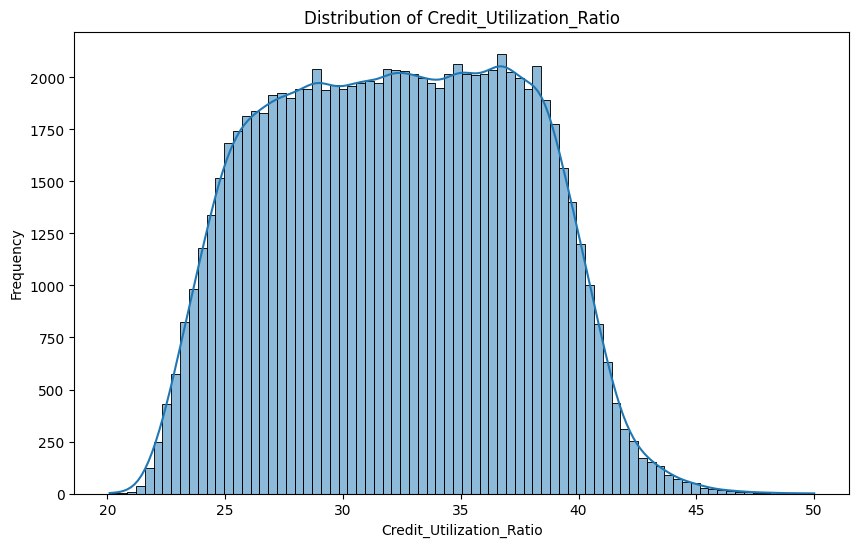

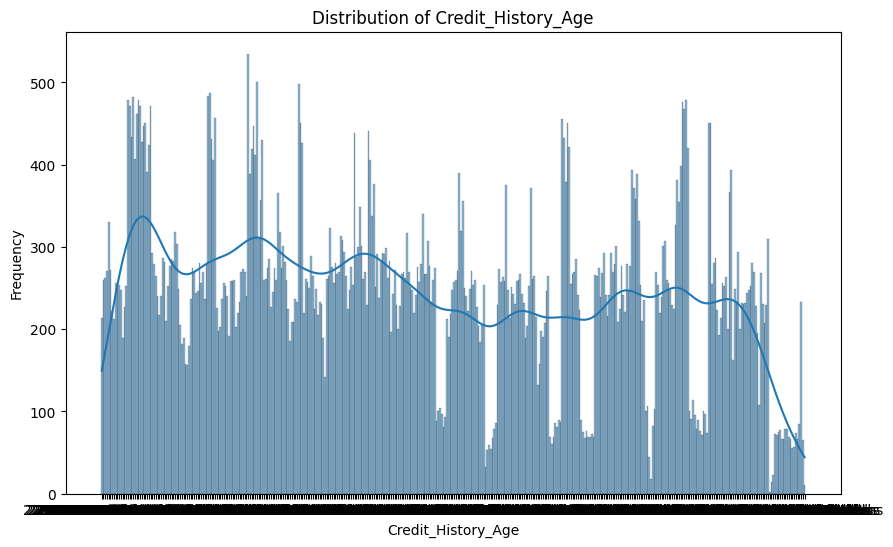

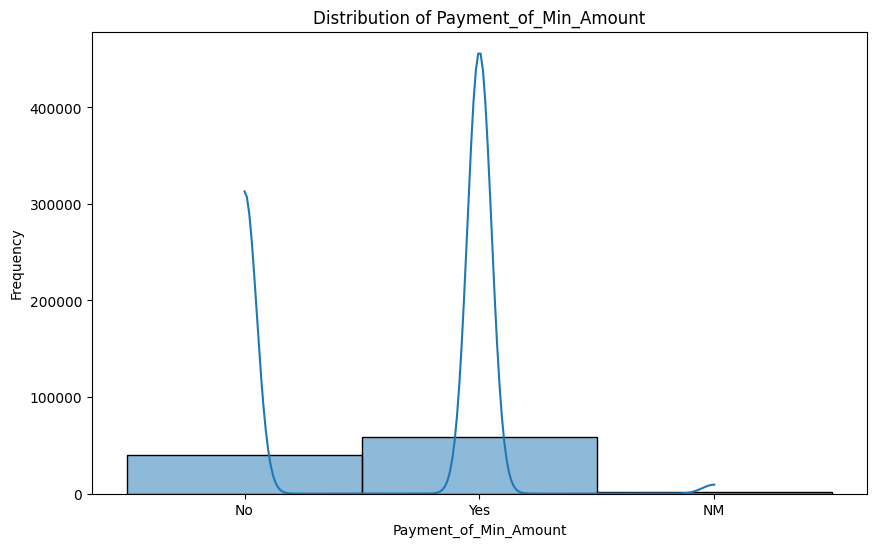

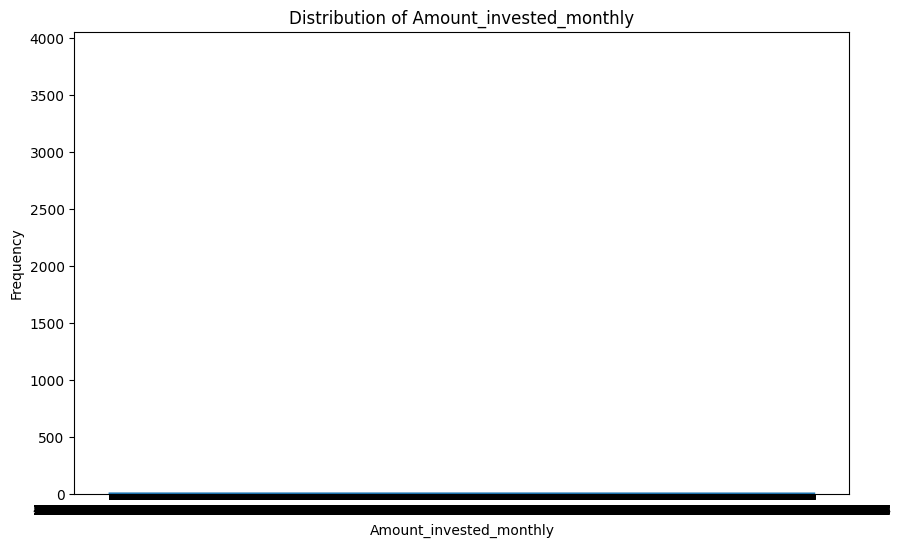

In [119]:
# Make a graphical representation of each column in the dataset
def plot_columns(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# Plot the columns in the dataset
plot_columns(df)

In [106]:
# Describe the dataset
display(
    raw_df.describe(exclude=np.number).T, 
    print()
)

,count,unique,top,freq
ID,90058,90058,0x1603,1
Customer_ID,90107,12500,CUS_0x2646,8
Month,90062,8,April,11319
Name,81113,10139,Langep,42
City,90149,4,Standhampton,47744
Street,90080,31,Quality Street,5343
SSN,89999,12501,#F%$D@*&8,5008
Occupation,90056,21,Journalist,17002
Annual_Income,89906,18438,17273.83,15
Num_of_Loan,89809,399,3,12898


None

In [107]:
# Create a copy of the 'Credit_Score' column
credit_score_df = raw_df['Credit_Score'].copy()
credit_score_df

0        3
1        3
2        3
3        3
4        3
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Score, Length: 100000, dtype: int64

In [108]:
# Remove the 'ID', 'SSN' and 'Name' column from the DataFrame
df.drop(columns=['ID', 'SSN', 'Credit_Score'], inplace=True, axis=1)
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS_0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,_,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS_0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS_0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS_0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS_0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,_,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS_0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,NaN,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS_0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


---

## Cleaning the dataset

In [109]:
# Find all the columns that contain underscores in their values
underscore_columns = []
for col in df.columns:
    # Check if column contains any string values
    if df[col].dtype == 'object' and df[col].astype(str).str.contains('_').any():
            underscore_columns.append(col)

print("Columns with underscores:", underscore_columns)

# Clean underscores from all columns identified except 'Customer_ID' and 'Occupation' (assuming these are the columns you want to keep underscores in)
for col in underscore_columns:
    if col != 'Customer_ID' or col != 'Occupation':
        df[col] = df[col].apply(lambda x: x.replace('_','') if isinstance(x, str) else x)
df

Columns with underscores: ['Customer_ID', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Amount_invested_monthly']


,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,NaN,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


In [110]:
# Finding the uniform columns in the DataFrame
def uniform_columns(df, chunk_size=8):
    chunks_total = len(df) // chunk_size
    uniform_columns = []

    for col in df.columns:
        uniform_count = 0
        for i in range(chunks_total):
            chunk = df.iloc[i*chunk_size:(i+1)*chunk_size]
            non_na_values = set(chunk[col].dropna())
            if len(non_na_values) <= 1:
                uniform_count += 1
        if uniform_count == chunks_total:
            uniform_columns.append(col)
    return uniform_columns

uniform_col = uniform_columns(df,8)
uniform_col

['Customer_ID',
 'Name',
 'Street',
 'Occupation',
 'Type_of_Loan',
 'Outstanding_Debt']

### Customer ID

In [111]:
# Process the DataFrame in chunks of 8 rows
chunk_size = 8

# Fill the Customer_ID column with the mode value of each chunk
for start in range(0, len(df), chunk_size):
    end = start + chunk_size
    # Use indices to work with the chunk
    chunk_indices = df.index[start:end]
    chunk = df.loc[chunk_indices]
    # For each specified column, calculate the mode and update the chunk rows
    mode_value = chunk['Customer_ID'].mode().iloc[0]
    df.loc[chunk_indices, 'Customer_ID'] = mode_value
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,NaN,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,NaN,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,NaN,33.638208,31 Years and 9 Months,No,251.67258219721603


### Uniform Columns (Name, Street, Occupation, Type_of_Loan, Outstanding_Debt)

In [112]:
# Create a copy of the DataFrame with only the uniform columns
uniform_df = df[uniform_col].copy()

# For each uniform column fill the missing values with the mode of each grouped Customer_ID
for col in uniform_df.columns:
    if col != 'Customer_ID':
        uniform_df[col] = uniform_df.groupby('Customer_ID')[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        df[col] = uniform_df[col]
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Num of Loans

In [113]:
# Remake the Num_of_Loan column by counting each loan type in the Type_of_Loan column
df['Num_of_Loan'] = df['Type_of_Loan'].fillna("").apply(
    lambda x: len([item for item in x.split(",") if item.strip()]))
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,Standhampton,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### City

In [114]:
# Considered that 'Street' is a uniform column we can fill the missing values in 'City' in the same way and fix the errors in the 'City' column
city_df = df[['Customer_ID', 'City']].copy()

# First, get the mode of 'City' for each customer ID group
city_modes = city_df.groupby('Customer_ID')['City'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Marking error values that don't match the mode of the group as NaN
city_df['City'] = city_df.apply(lambda row: 
    np.nan if (pd.notnull(row['City']) and 
                row['City'] != city_modes[row['Customer_ID']]) 
    else row['City'], axis=1)

# Filling all NaN values with the mode of the group
city_df['City'] = city_df.apply(lambda row: 
    city_modes[row['Customer_ID']] if (pd.isnull(row['City']) and 
                                        row['Customer_ID'] in city_modes)
    else row['City'], axis=1)

# Updating the original DataFrame with the cleaned 'City' column
df['City'] = city_df['City']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,February,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,NaN,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,April,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,May,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,April,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,May,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,June,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,July,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Month

In [115]:
# Define month encoding
month_to_number = { "January": 1,
                    "February": 2,
                    "March": 3,
                    "April": 4,
                    "May": 5,
                    "June": 6,
                    "July": 7,
                    "August": 8}

# Encode the known months
df["Month"] = df["Month"].map(month_to_number)

# Fill in the missing values using the repeating sequence 1-8
encoded_cycle = list(islice(cycle(range(1, 9)), len(df)))
df["Month"] = encoded_cycle
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,NaN,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,NaN,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Credit_History_Age

In [116]:
# Turning strings into (years, months)
def parse_age(age_str):
    if pd.isna(age_str):
        return np.nan, np.nan
    parts = age_str.split() # should be for example ["22", "Years", "and", "1", "Months"]
    return int(parts[0]), int(parts[3])

def format_age(years, months):
    return f"{years} Years and {months} Months"

# Determine number of groups (each group has 8 rows)
n_groups = len(df) // chunk_size

# Process each group
for i in range(n_groups):
    start = i * chunk_size
    end = start + chunk_size
    group = df.iloc[start:end]
    
    # Extract years and months for the non-missing values
    years_list = []
    months_list = []
    indices = []
    for idx, row in group.iterrows():
        years, months = parse_age(row['Credit_History_Age'])
        if not (pd.isna(years) or pd.isna(months)):
            years_list.append(years)
            months_list.append(months)
            indices.append(idx)
    
    # If we have at least two known points, we can linearly interpolate by index
    if len(indices) >= 2:
        # Create arrays for interpolation over the index positions (0 to 7)
        pos = np.array(indices)
        # We assume the interpolation is linear with respect to the row number
        # Interpolate years and months separately
        all_pos = np.arange(start, end)
        # Interpolate years
        years_interp = np.interp(all_pos, pos, years_list)
        # Interpolate months
        months_interp = np.interp(all_pos, pos, months_list)
        
        # Round the results (since ages are integers)
        years_interp = np.round(years_interp).astype(int)
        months_interp = np.round(months_interp).astype(int)
        
        # Update the dataframe for rows with NaN
        for pos_idx, row_idx in enumerate(range(start, end)):
            if pd.isna(df.loc[row_idx, 'Credit_History_Age']):
                df.loc[row_idx, 'Credit_History_Age'] = format_age(years_interp[pos_idx], months_interp[pos_idx])
    else:
        # If not enough points to interpolate, we might use forward fill if available
        df.iloc[start:end, df.columns.get_loc('Credit_History_Age')] = group['Credit_History_Age'].ffill().bfill()

df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,22 Years and 2 Months,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Payment_of_Min_Amount

In [117]:
# Fix the errors in the 'Payment_of_Min_Amount' column
payment_df = df[['Customer_ID', 'Payment_of_Min_Amount']].copy()

# First, get the mode of 'Payment_of_Min_Amount' for each customer ID group
payment_modes = payment_df.groupby('Customer_ID')['Payment_of_Min_Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Marking error values that don't match the mode of the group as NaN
payment_df['Payment_of_Min_Amount'] = payment_df.apply(lambda row: 
    np.nan if (pd.notnull(row['Payment_of_Min_Amount']) and 
                row['Payment_of_Min_Amount'] != payment_modes[row['Customer_ID']]) 
    else row['Payment_of_Min_Amount'], axis=1)

# Filling all NaN values with the mode of the group
payment_df['Payment_of_Min_Amount'] = payment_df.apply(lambda row: 
    payment_modes[row['Customer_ID']] if (pd.isnull(row['Payment_of_Min_Amount']) and 
                                        row['Customer_ID'] in payment_modes)
    else row['Payment_of_Min_Amount'], axis=1)

# Updating the original DataFrame with the cleaned 'Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'] = payment_df['Payment_of_Min_Amount']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,NaN,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,22 Years and 2 Months,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,-500.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,NaN,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Age

In [118]:
# Fix the errors in the 'Age' column
age_df = df[['Customer_ID', 'Age']].copy()

def age_fix(age_series):
    corrected = []
    age1 = None  # The first valid age
    age2 = None  # The second valid age 

    for val in age_series:
        # Decide whether this entry is valid
        if pd.isna(val) or val < 13 or val > 120:
            # invalid or missing -> fill with known age if possible
            if age1 is None:
                # no known valid age yet
                corrected.append(np.nan)
            elif age2 is None:
                # we've only established age1 so far
                corrected.append(age1)
            else:
                # we've already switched to age2
                corrected.append(age2)
        else:
            # val is a valid age
            if age1 is None:
                # first valid age we see
                age1 = val
                corrected.append(val)
            else:
                # already have age1
                if val == age1:
                    # same as first age
                    if age2 is None:
                        corrected.append(age1)
                    else:
                        # we already switched to age2, so ignore going "back" to age1
                        corrected.append(age2)
                else:
                    # val is a different age
                    if age2 is None:
                        # first time we see a new age -> set age2
                        age2 = val
                        corrected.append(val)
                    else:
                        # can't have a third age -> stick to age2
                        corrected.append(age2)
    # Fill in leading/trailing NaNs
    corrected = pd.Series(corrected).ffill().bfill().values
    return corrected

# Loop explicitly over each group by Customer_ID and update the age_df DataFrame
for customer, group in age_df.groupby('Customer_ID'):
    group_index = group.index
    corrected_values = age_fix(group['Age'])
    age_df.loc[group_index, 'Age'] = corrected_values

# Updating the original DataFrame with the cleaned 'Age' column
df['Age'] = age_df['Age']
df

,Customer_ID,Month,Name,City,Street,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly
0,CUS0xd40,1,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,3.0,7,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,80.41529543900253
1,CUS0xd40,2,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,-1.0,NaN,11.27,4.0,NaN,809.98,31.944960,22 Years and 2 Months,No,118.28022162236736
2,CUS0xd40,3,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,3.0,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,81.699521264648
3,CUS0xd40,4,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,NaN,3.0,...,5.0,4,6.27,4.0,Good,809.98,NaN,22 Years and 4 Months,No,199.4580743910713
4,CUS0xd40,5,Aaron Maashoh,Lonton,Oxford Street,23.0,Manager,19114.12,1824.843333,3.0,...,6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,41.420153086217326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS0x942c,4,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,3359.415833,4.0,...,23.0,7,11.5,NaN,,502.38,34.663572,31 Years and 6 Months,No,60.97133255718485
99996,CUS0x942c,5,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,4.0,...,18.0,7,11.5,3.0,,502.38,40.565631,31 Years and 7 Months,No,54.18595028760385
99997,CUS0x942c,6,Nicks,BadShire,North Street,25.0,Cleaner,NaN,NaN,4.0,...,27.0,6,11.5,NaN,Good,502.38,41.255522,31 Years and 8 Months,No,24.02847744864441
99998,CUS0x942c,7,Nicks,BadShire,North Street,25.0,Cleaner,39628.99,NaN,NaN,...,20.0,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,251.67258219721603


### Annual Income